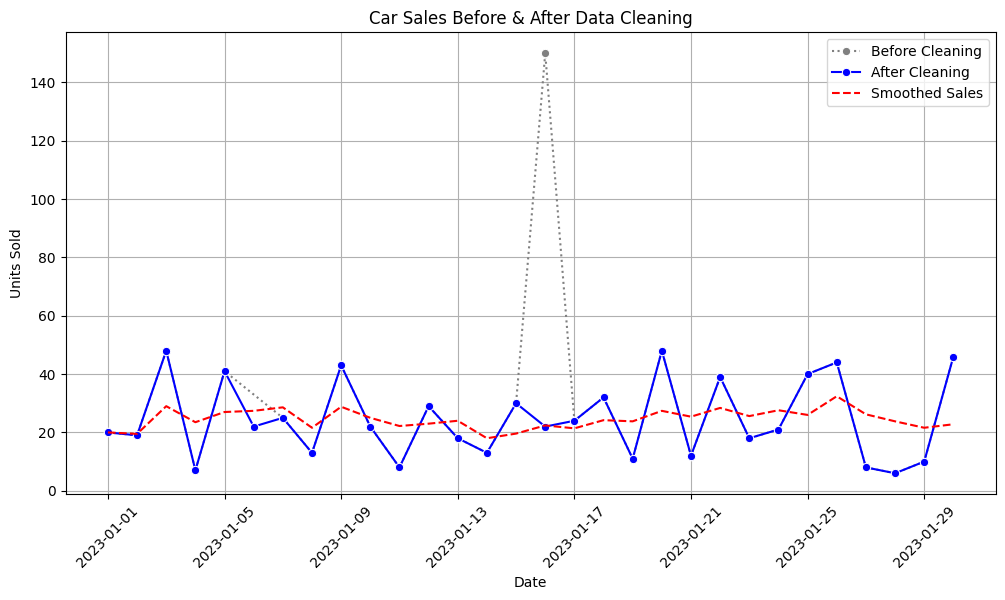


📌 RAW DATA BEFORE PROCESSING:
        Date    Car Model  Units Sold  Revenue
0 2023-01-01        Truck        20.0  19692.0
1 2023-01-02  Convertible        19.0  16873.0
2 2023-01-03    Hatchback        48.0  15675.0
3 2023-01-04  Convertible         7.0  10161.0
4 2023-01-05  Convertible        41.0  47065.0
5 2023-01-06          SUV         NaN  36557.0
6 2023-01-07    Hatchback        25.0  43763.0
7 2023-01-08    Hatchback        13.0  42606.0
8 2023-01-09    Hatchback        43.0  21534.0
9 2023-01-10  Convertible        22.0  39127.0

✅ CLEANED & PROCESSED DATA:
        Date    Car Model  Units Sold  Revenue  Year  Month  Day  \
0 2023-01-01        Truck        20.0  19692.0  2023      1    1   
1 2023-01-02  Convertible        19.0  16873.0  2023      1    2   
2 2023-01-03    Hatchback        48.0  15675.0  2023      1    3   
3 2023-01-04  Convertible         7.0  10161.0  2023      1    4   
4 2023-01-05  Convertible        41.0  47065.0  2023      1    5   
5 2023-01-06   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Create a synthetic dataset
dates = pd.date_range(start="2023-01-01", periods=30, freq='D')  # January 2023
car_models = ['Sedan', 'SUV', 'Hatchback', 'Truck', 'Convertible']

df = pd.DataFrame({
    'Date': dates,
    'Car Model': np.random.choice(car_models, size=30),
    'Units Sold': np.random.randint(5, 50, size=30),
    'Revenue': np.random.randint(10000, 50000, size=30)
})

# Introduce missing values and outliers
df.loc[5, 'Units Sold'] = np.nan  # Missing value
df.loc[10, 'Revenue'] = np.nan  # Missing value
df.loc[15, 'Units Sold'] = 150  # Outlier

# Save a copy of raw data before preprocessing
df_before = df.copy()

# Step 2: Handle Missing Values (Fill with Median)
df.fillna({'Units Sold': df['Units Sold'].median(), 'Revenue': df['Revenue'].median()}, inplace=True)

# Step 3: Handle Outliers (Cap values at 99th percentile)
units_sold_99 = df['Units Sold'].quantile(0.99)
df['Units Sold'] = np.where(df['Units Sold'] > units_sold_99, df['Units Sold'].median(), df['Units Sold'])

# Step 4: Convert Date to DateTime format and Extract Features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Step 5: Normalize Revenue using Min-Max Scaling
df['Revenue_Normalized'] = (df['Revenue'] - df['Revenue'].min()) / (df['Revenue'].max() - df['Revenue'].min())

# Step 6: Moving Average (Smoothing) for Units Sold
df['Units_Sold_Smoothed'] = df['Units Sold'].rolling(window=5, min_periods=1).mean()

# ---- PLOT BEFORE & AFTER TRANSFORMATIONS ---- #
plt.figure(figsize=(12, 6))

# Plot raw data before processing
sns.lineplot(x=df_before['Date'], y=df_before['Units Sold'], label="Before Cleaning", marker="o", linestyle="dotted", color="gray")

# Plot cleaned & smoothed data
sns.lineplot(x=df['Date'], y=df['Units Sold'], label="After Cleaning", marker="o", color="blue")
sns.lineplot(x=df['Date'], y=df['Units_Sold_Smoothed'], label="Smoothed Sales", linestyle="--", color="red")

plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Car Sales Before & After Data Cleaning")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# ---- DISPLAY BEFORE & AFTER DATA ---- #
print("\n📌 RAW DATA BEFORE PROCESSING:")
print(df_before.head(10))  # Show first 10 rows before processing

print("\n✅ CLEANED & PROCESSED DATA:")
print(df.head(10))  # Show first 10 rows after processing
